In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Iterable, Tuple, List, Callable

In [2]:
def objective_func(x):
    return x * np.sin(10 * np.pi * x) + 2.0

In [3]:
CHROMOSOME_SIZE = 12
POPULATION_SIZE = 10
CROSSOVER_RATE = 0.8

x_min = -1
x_max = 2

print(POPULATION_SIZE)

10


In [4]:
x_range = np.linspace(x_min,x_max, 100)
y_range = objective_func(x_range)

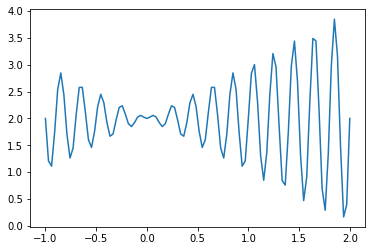

In [5]:
plt.plot(x_range, objective_func(x_range))

In [6]:
def bin_to_float(bin_arr, a = 0, b = 1):
    
    dec = np.power(2, np.arange(len(bin_arr))) @ bin_arr
    
    zero_one_range = dec / (2**len(bin_arr))
    
    real_num = zero_one_range * (b - a) + a
    
    return real_num


def initialize_genotype_population(population_size, chromo_size):
    
    x = np.random.randint(low = 0, high = 2, size = (population_size, chromo_size))
    
    return x
    

def genotype_to_phenotype(x, x_min=0, x_max=1):
    
    df = pd.DataFrame(x)
    
    return df.apply(bin_to_float, axis=1, raw=True, a=x_min, b=x_max)

In [7]:
def evaluate(x_phenotype):
    return x_phenotype.map(objective_func)

In [8]:
x = np.concatenate((np.random.randint(low=0, high=2,size=(2,12)),np.array([[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]])))
x

array([[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]])

In [9]:
x_genotype = initialize_genotype_population(POPULATION_SIZE, CHROMOSOME_SIZE)
x_genotype

array([[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]])

In [10]:
%%time
x_phenotype = genotype_to_phenotype(x_genotype, x_min, x_max)

Wall time: 31.2 ms


In [11]:
%%time
evals = evaluate(x_phenotype)

Wall time: 0 ns


In [12]:
def calc_relative_fittness(evals):
    return evals/evals.sum()
    

In [13]:
rel_fittness = calc_relative_fittness(evals)
rel_fittness

0    0.153728
1    0.080389
2    0.119958
3    0.089293
4    0.089320
5    0.119794
6    0.055741
7    0.113772
8    0.051108
9    0.126896
dtype: float64

In [14]:
def create_mating_pool(genotype_arr, prob_arr):
    indeces = np.random.choice(np.arange(len(prob_arr)), size=len(genotype_arr), replace=True, p=prob_arr)
    return genotype_arr[indeces]

In [15]:
mating_pool = create_mating_pool(x_genotype, rel_fittness)

In [16]:
mating_pool

array([[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]])

In [17]:
def make_crossover(x: List):
    print(f'crossover:\n{x}')
    return x

In [18]:
def split_to_chunks(x: Iterable, n: int):
    '''
    splits x array into evenly sized chunks. 
    x: array to split into chunks.
    n: number of elements in chunks.
    '''
    assert len(x) % n == 0, 'length of x should be divisible on n with remainder equal to 0.'
    
    for i in range(0, len(x), n):
        yield x[i:i + n]  

In [19]:
def create_next_generation(x: Iterable, c_r: float = 0.5, splitter: Callable, crossover: Callable):
    '''
    Performs crossover of individuals.
    
    x: mating pool of individuals to perform crossover on (2d array). dim0 - is individuals, dim1 - genes;
    c_r: crossover rate. number bewteen 0 and 1. probability that given two individuals perform a crossover. 
    if two individuals do not perform a crossover according to probability c_r, their off-spring are themselves. 
    
    '''
    new_generation = []
    
    np.random.shuffle(x)
    
    chunks = split_to_chunks(x, 2)
    
    for ch in chunks:
        if np.random.rand() < c_r:
            offsprings = make_crossover(ch)
            new_generation.extend(offsprings)
        else:
            print(f'No crossover\n{ch}')
            new_generation.extend(ch)
            
    return np.array(new_generation)

In [20]:
crossover(mating_pool)

No crossover
[[0 0 0 1 1 1 0 0 1 0 1 0]
 [0 1 0 1 1 0 1 0 1 1 1 1]]
crossover:
[[0 0 0 0 0 1 1 0 1 0 0 0]
 [0 0 0 1 1 1 0 0 1 0 1 0]]
crossover:
[[0 0 0 1 1 1 0 0 1 0 1 0]
 [0 0 0 1 1 1 0 0 1 0 1 0]]
crossover:
[[1 0 0 1 0 0 1 1 0 0 0 0]
 [0 0 1 1 0 1 1 1 1 1 0 0]]
No crossover
[[1 1 1 1 1 1 0 1 0 1 1 0]
 [0 1 0 1 1 0 1 0 1 1 1 1]]


array([[0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]])